### Import libraries

In [1]:
from plotnine import *
import pandas as pd

Load/import data

In [2]:
data = pd.read_csv('./otu_table_final_rarefied_L6.txt', sep="\t")
mapping = pd.read_csv('./mapping_file.tsv', sep="\t")

### Prepare data

In [12]:
data2 = data[data['Taxon'].str.contains('o__Enterobacteriales')]
data2 = pd.melt(data2, id_vars =['Taxon'])
print(data2.head())

                                               Taxon variable     value
0  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.000000
1  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.000000
2  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.176230
3  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.473361
4  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.000000


### Then merge data2 with mapping data frame:

In [11]:
data3 = pd.merge(data2, mapping, left_on='variable', right_on='#SampleID')
print(data3.head())

                                               Taxon variable     value  \
0  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.000000   
1  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.000000   
2  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.176230   
3  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.473361   
4  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...    002v2  0.000000   

  #SampleID  IndividualID Visit Group Treatment  
0     002v2             2    v2     A      v2.A  
1     002v2             2    v2     A      v2.A  
2     002v2             2    v2     A      v2.A  
3     002v2             2    v2     A      v2.A  
4     002v2             2    v2     A      v2.A  


### We now have the data ready to plot with plotnine(ggplot2)

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


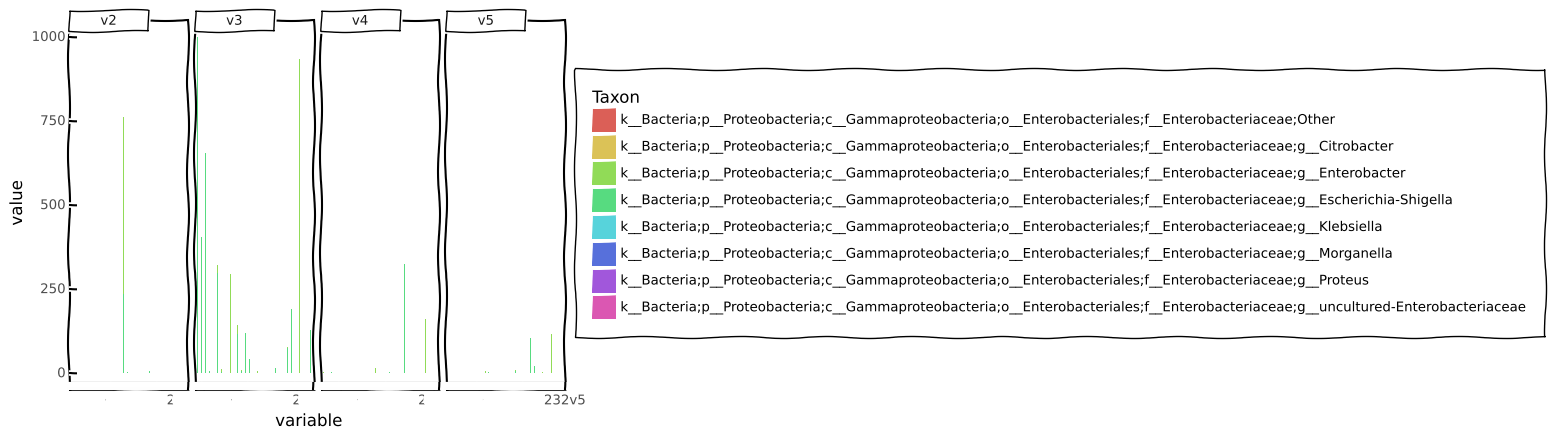

In [16]:
plot = (ggplot(data3, aes('variable', 'value', fill='Taxon'))
 + geom_col()
 + facet_grid('. ~ Visit')
 + theme_xkcd())
print(plot)

### Here we see that Escherichia-Shigella are highly enriched in visit 3

In [ ]:
#  for some reason the ggplot code is really slow to run. Not sure why. Much faster on R's ggplot2.